<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 567
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           505 non-null    object 
 1   year             505 non-null    int64  
 2   population       505 non-null    float64
 3   region_standard  505 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.7+ KB
None

Пропуски по колонкам:
 region             0
year               0
population         0
region_standard    0
dtype: int64

Уникальных регионов: 83
Уникальных лет: 6

Статистика численности населения:
 count    5.050000e+02
mean     1.760602e+06
std      1.591117e+06
min      4.089600e+04
25%      8.583120e+05
50%      1.274503e+06
75%      2.552298e+06
max      1.072643e+07
Name: population, dtype: float64


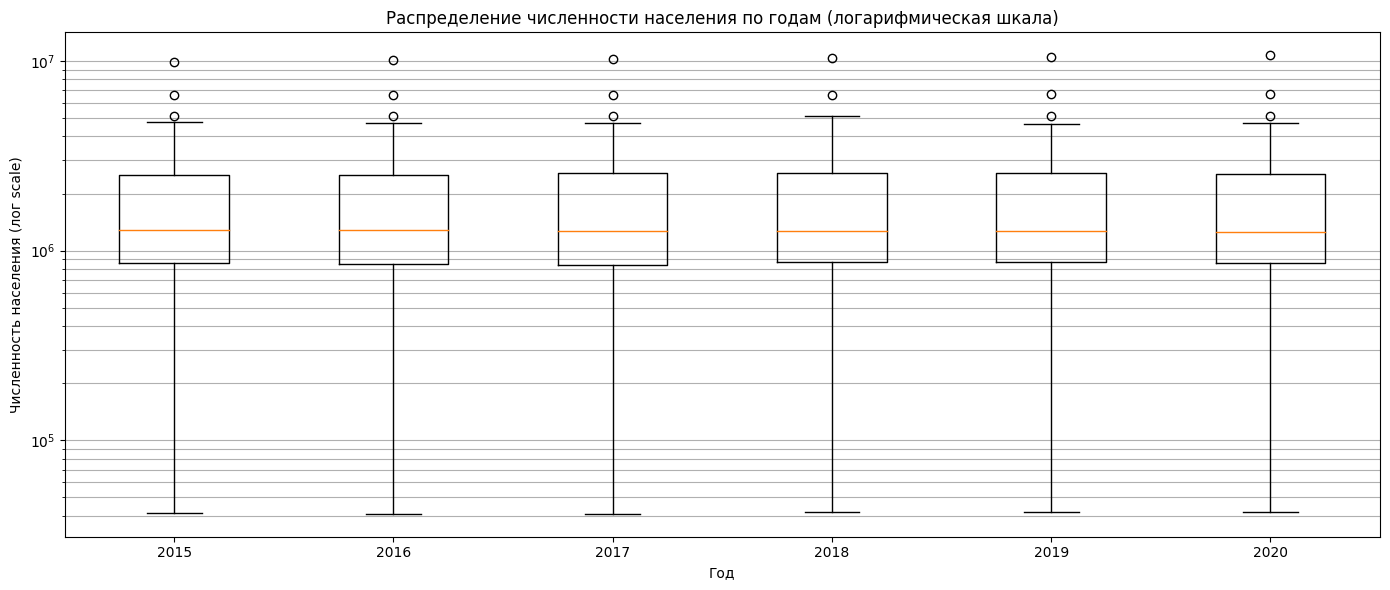

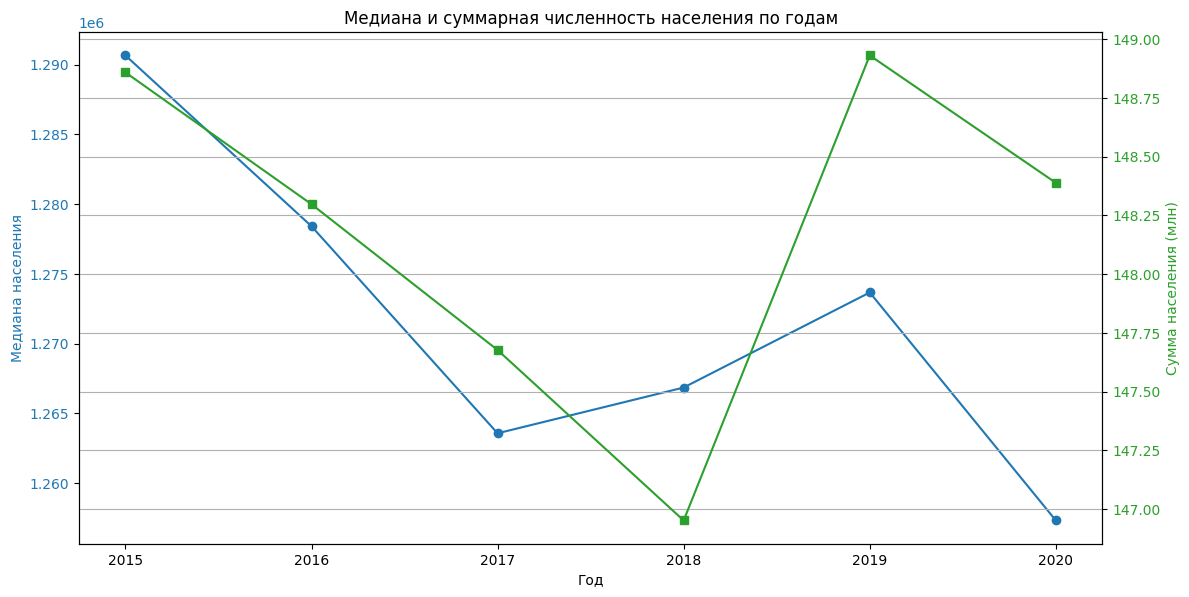

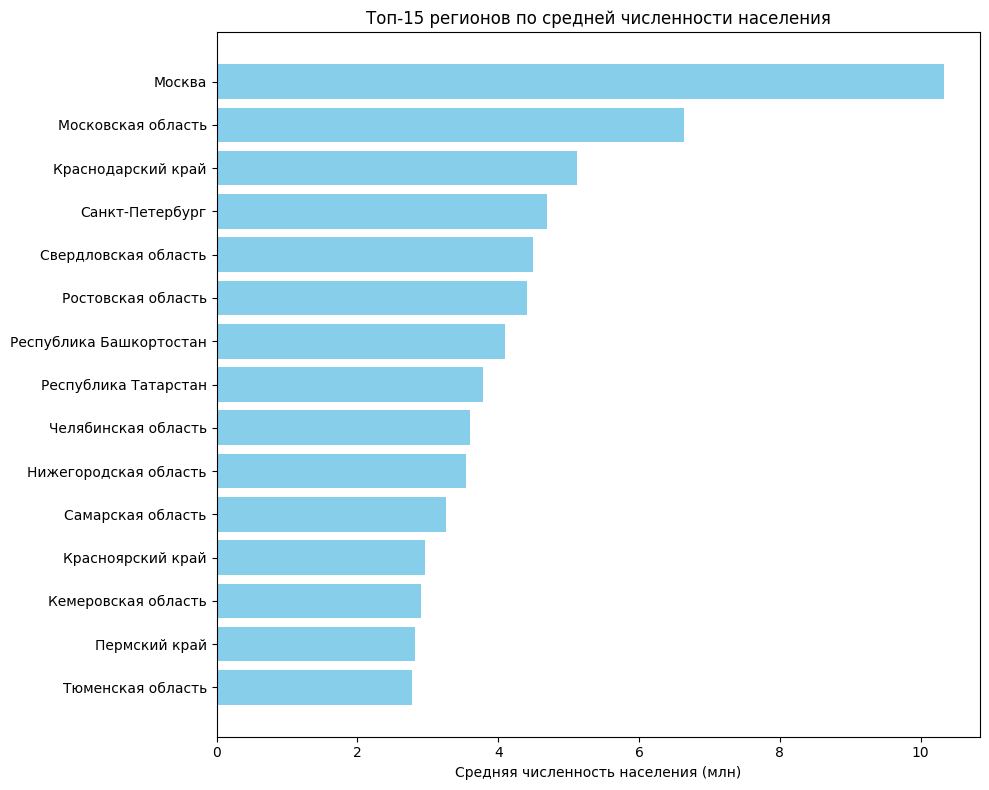

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/population_standardized.csv"
df = pd.read_csv(file_path)

# 2. Фильтрация по region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные значения
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())

# 5. Описательная статистика
print("\nСтатистика численности населения:\n", df["population"].describe())

# 6. Тренды медианы и суммы
median_population_by_year = df.groupby("year")["population"].median()
sum_population_by_year = df.groupby("year")["population"].sum()

# 7. Boxplot с логарифмической шкалой
plt.figure(figsize=(14,6))
plt.boxplot(
    [df[df["year"] == year]["population"] for year in sorted(df["year"].unique())],
    labels=sorted(df["year"].unique())
)
plt.yscale("log")
plt.title("Распределение численности населения по годам (логарифмическая шкала)")
plt.ylabel("Численность населения (лог scale)")
plt.xlabel("Год")
plt.grid(True, which="both", axis="y")
plt.tight_layout()
plt.show()

# 8. Тренды медианы и суммы с двумя осями
fig, ax1 = plt.subplots(figsize=(12,6))

color1 = "tab:blue"
ax1.set_xlabel("Год")
ax1.set_ylabel("Медиана населения", color=color1)
ax1.plot(median_population_by_year.index, median_population_by_year.values, color=color1, marker="o", label="Медиана")
ax1.tick_params(axis="y", labelcolor=color1)

ax2 = ax1.twinx()
color2 = "tab:green"
ax2.set_ylabel("Сумма населения (млн)", color=color2)
ax2.plot(sum_population_by_year.index, sum_population_by_year.values/1e6, color=color2, marker="s", label="Сумма")
ax2.tick_params(axis="y", labelcolor=color2)

fig.tight_layout()
plt.title("Медиана и суммарная численность населения по годам")
plt.grid(True)
plt.show()

# 9. Топ-15 регионов по средней численности
top15_regions = (
    df.groupby("region_standard")["population"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,8))
plt.barh(top15_regions.index, top15_regions.values/1e6, color="skyblue")
plt.xlabel("Средняя численность населения (млн)")
plt.title("Топ-15 регионов по средней численности населения")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# EDA таблицы `population_standardized.csv`

**Описание данных**
- 505 записей по 83 регионам.
- Период: 2015–2020 годы.
- Показатель: численность населения.

---

**Типы данных**
- Все признаки корректны:
  - `year` — int64
  - `population` — float64
  - `region_standard` — object

---

**Пропуски**
- Отсутствуют после фильтрации.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее население: ~1,760,600 человек.
- Медиана: ~1,274,500.
- Максимум: ~10,726,000 (Москва).
- 75% значений ниже ~2,552,000.
- Минимум: ~40,896.

---

**Тренды медианы и суммарного населения по годам**
- Медианное население по регионам оставалось стабильным.
- Сумма населения по всем регионам показывала небольшой рост.
- Москва остаётся крупнейшим регионом по населению.

---

**Распределение по годам**
- Boxplot с логарифмической шкалой показывает сильное смещение в сторону больших значений.
- Основная масса регионов с населением до ~2 млн человек.

---

**Топ-15 регионов по средней численности населения**
*(см. график горизонтального bar chart)*

1. Москва
2. Московская область
3. Краснодарский край
4. Республика Башкортостан
5. Санкт-Петербург
6. Ростовская область
7. Челябинская область
8. Свердловская область
9. Республика Татарстан
10. Самарская область
11. Нижегородская область
12. Республика Дагестан
13. Ханты-Мансийский автономный округ
14. Ставропольский край
15. Пермский край

---

**Визуализации**
- Boxplot с логарифмом — для лучшей видимости диапазона.
- Линии медианы и суммы населения по годам.
- Гистограмма и топ-15 регионов по средней численности.

---

**Выбросы**
- Высокие значения приходятся на Москву и Московскую область


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/population_AfterEDA.csv", index=False)